<a href="https://colab.research.google.com/github/mateusokp/Deep-Learning/blob/main/E03_Leitura_de_Dados_Rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
%%capture
!rm *
!gdown --id '1BLyWu9zDytBTGR6vLL-UTSAZhpwRQD6b'
!gdown --id '1a5jY17w-SINzRRdq2iH6SFEQiS_ZaAKj'
!gdown --id '1RmUz5LqBQbfn02hvPdwP4ICpWVfa_bTV'
!gdown --id '1ZkG09pQDz29mOFR5VTMPEirvwClVNj_F'
!gdown --id '14zHXla8960NSNjqzf2j1ip8pFYqGyPRJ'
#!gdown --id '1vWtNHG3ehZyjmWUlP85i9z4u7G7Ror7L'
!gdown --id '1KNQKU68Y_XtFN2AS0guGpKDmiMM3YNij'
!gdown --id '1R9LZJw-lvngWOVSInKNhKNkvTPpuS0KI'
#!gdown --id '1UaAWEmE6Igp7P9C5EQJby_EykEiI_fZ1'
!gdown --id '11vJUJtgumou5hkM1a8TribAXkHDlSpz_'
!gdown --id '1jNFpdEtEbtcMgd51K6pjEvjB0hCFEI_E'
!gdown --id '1dNZ8LvkczzE1oOdh_S7cu3Z5eG4T4EqG'
!pip install git+https://github.com/grading/gradememaybe.git

from IPython.display import YouTubeVideo
from gofer import ok

# 1 Upload do Arquivo

Use o espaço abaixo para fazer o upload do arquivo para o ambiente do Google Colab. Para isso você pode usar o comando `gdown` (lembre-se de colocar o sinal de exclamação `!` para chamar comandos na linha de comando, fora do Python).

In [ ]:
# Seu código aqui
!gdown https://drive.google.com/uc?id=1d3NbjXro_BfnYpFm66ETBfe7ubAZPAoL

Downloading...
From: https://drive.google.com/uc?id=1d3NbjXro_BfnYpFm66ETBfe7ubAZPAoL
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 4.69MB/s]


In [ ]:
ok.check('e03_1.py')

# 2 Leitura do Arquivo

Escreva um laço que leia todas as linhas do arquivo, criando uma lista numa variável de nome 'd0', onde cada elemento da lista é uma string que corresponde a uma linha do arquivo.

In [ ]:
# Seu código aqui
f = open("/content/Iris.csv")
d0 = f.readlines()

In [ ]:
ok.check('e03_2.py')

# 3 Remoção de Cabeçalho e Contagem de Linhas

Utilizando a mesma variável `d0`, agora remova o cabeçalho (que deve ser o primeiro elemento da lista), e conte as linhas de dados. Grave o total de linhas numa variável de nome `total`.

In [ ]:
# Seu código aqui
d0.pop(0)
total = len(d0)

In [ ]:
ok.check('e03_3.py')

# 4 Remoção de Novas Linhas

Crie uma nova lista numa variável de nome `d1` onde cada elemento de `d1` corresponda à versão do mesmo elemento em `d0`, removendo o caractere de nova linha `\n` que aparece ao final de cada item. Assegure-se de que cada elemento da lista `d1` seja uma string simples (dependendo como você fez o upload, pode acontecer dos elementos estarem codificados, então decodifique caso necessário).

In [ ]:
# Seu código aqui
d1 = [line.strip('\n') for line in d0]

In [ ]:
ok.check('e03_4.py')

# 5 Separação por Vírgulas

Crie uma nova lista em uma variável de nome `d2` onde cada elemento dessa lista seja uma sublista contendo as strings correspondentes a cada dado da string original, usando a vírgula como separador.

Por exemplo, transforme isso:

`'14,4.3,3.0,1.1,0.1,Iris-setosa'`

nisso:

`['14', '4.3', '3.0', '1.1', '0.1', 'Iris-setosa']`

Faça isso para todos elementos, na mesma ordem da lista original, gravando o resultado em `d2`.


In [ ]:
# Seu código aqui
d2 = [line.split(',') for line in d1]


In [ ]:
ok.check('e03_5.py')

# 6 Entradas de Treinamento

Crie uma matriz no formato `array` do NumPy, numa variável de nome `d3`, contendo todos os dados da segunda, terceira, quarta e quinta colunas de `d2` transformados para o formato ponto flutuante (convertendo de string para número). Não inclua nem a primeira coluna (que é o id), nem a última coluna nessa conversão. Essa será a matriz de entradas.

In [ ]:
# Escreva seu código aqui
import numpy as np
d3 = np.zeros((total,4))
for i,line in enumerate(d2):
  sl = float(line[1])
  sw = float(line[2])
  pl = float(line[3])
  pw = float(line[4])
  d3[i:] = np.array([sl,sw,pl,pw])

In [ ]:
ok.check('e03_6.py')

# 7 Saídas Desejadas

Crie um `array` do NumPy para as saídas desejadas, no formado _one-hot_. Para isso utilize as strings da última coluna de `d2`, verificando qual espécie de planta se refere cada string:

 `'Iris-setosa'` $\rightarrow$ `[1.0, 0.0, 0.0]`
 
 `'Iris-versicolor'` $\rightarrow$ `[0.0, 1.0, 0.0]`

 `'Iris-virginica'` $\rightarrow$ `[0.0, 0.0, 1.0]`

 Grave o resultado em um `array` do NumPy de nome `d4`, com o mesmo número de linhas de `d3`, onde cada linha de `d4` corresponde ao vetor _one-hot_ da saída desejada da respectiva linha de entradas de `d4`.

In [ ]:
# Escreva seu código aqui
d4 = np.zeros((total,3))
cat = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
for i,line in enumerate(d2):
  d4[i:] = (cat == line[5]).astype('float')

In [ ]:
ok.check('e03_7.py')

# 8 Normalização das Entradas

Encontre o valor máximo e mínimo para cada uma das quatro colunas da matriz de entradas. Normalize os valores das entradas no intervalo entre zero e um, salvando o resultado em um `array` do NumPy de nome `d5`.

In [ ]:
# Escreva seu código aqui
dmm = np.zeros((4,2))
for i,number in enumerate(d3[0]):
  dmm[i][0] = number
  dmm[i][1] = number
for line in d3:
  for k,number in enumerate(line):
    dmm[k][0] = number if number < dmm[k][0] else dmm[k][0]
    dmm[k][1] = number if number > dmm[k][1] else dmm[k][1]
d5 = d3
for i,line in enumerate(d5):
  for j,number in enumerate(line):
    d5[i][j] = (number - dmm[j][0]) / (dmm[j][1] - dmm[j][0])


In [ ]:
ok.check('e03_8.py')

# 9 Embaralhamento dos Dados

Misture as linhas dos dados dos valores de entradas de treinamento contidos em `d5` de forma aleatória. Faça o mesmo com as linhas das saídas desejadas em `d4`, de forma a manter a correspondência entre ambos. Chame a `array` resultante de dados de treinamento embaralhado de `x` e a `array` correspondente de saídas desejadas de `y`.

In [ ]:
# Escreva seu código aqui
import random
z = list(zip(d5,d4))
random.shuffle(z)
x,y = zip(*z)


In [ ]:
ok.check('e03_9.py')

# 10 Separação de Dados de Treinamento e Validação

Separe os pares de dados de treinamento e validação nas proporções 90%/10%, respectivamente. Chame a entrada e saída desejada dos pares de treinamento de `x_train` e `y_train`, e use os nomes `x_test` e `y_test` para os dados de validação. Os dados de validação devem corresponder às linhas finais dos pares de `array` originais `x` e `y`.

In [ ]:
# Escreva seu código aqui

x_train = np.array(x[:135])
y_train = np.array(y[:135])
x_test = np.array(x[135:])
y_test = np.array(y[135:])

In [ ]:
ok.check('e03_10.py')

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

class Perceptron:
  def __init__(self):

    self.Wh = np.random.random((5,4))*2.0 - 1.0
    self.bh = np.random.random((5,1))*2.0 - 1.0

    self.Wh2 = np.random.random((4,5))*2.0 - 1.0
    self.bh2 = np.random.random((4,1))*2.0 - 1.0

    self.Wo = np.random.random((3,4))*2.0 - 1.0
    self.bo = np.random.random((3,1))*2.0 - 1.0

    self.eta = 0.0001

  def forward(self,x):

    x = np.reshape(x,(4,1))

    self.sh = np.dot(self.Wh,x) + self.bh
    self.zh = sigmoid(self.sh)

    self.sh2 = np.dot(self.Wh2,self.zh) + self.bh2
    self.zh2 = sigmoid(self.sh2)

    self.so = np.dot(self.Wo,self.zh2) + self.bo
    self.zo = sigmoid(self.so)
    return self.zo

  def train(self, X, Y):
    Err = 0.0
    total = X.shape[0]

    for i in range(total):
      x = X[i,:]
      x = np.reshape(x,(4,1))

      y_hat = Y[i,:]
      y_hat = np.reshape(y_hat,(3,1))

      y = self.forward(x)

      err = (np.sum((y - y_hat)**2)) / 2.0
      Err = Err + err

      self.do = (y - y_hat) * self.zo * (1.0 - self.zo)

      self.dh2 = np.dot(self.Wo.T, self.do) * self.zh2 * (1.0 - self.zh2)

      self.dh = np.dot(self.Wh2.T, self.dh2) * self.zh * (1.0 - self.zh)
  
      self.Wo = self.Wo - self.eta * np.dot(self.do,self.zh2.T)
      self.bo = self.bo - self.eta * self.do
      self.Wh2 = self.Wh2 - self.eta * np.dot(self.dh2,self.zh.T)
      self.bh2 = self.bh2 - self.eta * self.dh2
      self.Wh = self.Wh - self.eta * np.dot(self.dh,x.T)
      self.bh = self.bh - self.eta * self.dh
    
    Err = Err / total
    return Err

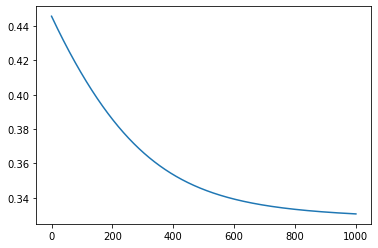

In [ ]:
p = Perceptron()
erro = []
for i in range(1000):
  erro.append(p.train(x_train,y_train))

x = np.linspace(0, len(erro),len(erro))
from matplotlib import pyplot as plt
plt.plot(x,erro)